In [1]:
%matplotlib inline
from equadratures import *
import numpy as np

<h1> On polynomial sampling strategies without gradients </h1>

Let us begin by defining our parameters and basis. Note, if you do not provide an order for the **Basis**, the code automatically assumes the order associated with the parameters. On the other hand, if you do provide an order for the **Basis**, that order will be used to set up the _Vandermonde_ type matrices.

In [2]:
x1 = Parameter(distribution='Uniform', order=3, lower=-1., upper=1.)
x2 = Parameter(distribution='Uniform', order=3, lower=-1., upper=1.)
totalorder = Basis('Total order', [2,2])

Consider the following function:
$$f(x_1, x_2) = 2x_1^2 - 2 x_1 x_1 - 3,$$

In [3]:
def fun(x):
    return 2.*x[0]**2 - 2*x[0]*x[1] - 3

Lets compute a polynomial approximation for this function without gradients. We hve a few options here. The mesh can be either <font color=red>_random_, _uniform_, _chebyshev_ </font> or <font color=red>_tensor_</font>. Three optimization strategies are also provided <font color=red>_greedy-qr_, _greedy-svd_ </font> or <font color=red>_newton_</font> . 

In [4]:
OBJECT = Polylsq(parameters=[x1, x2], 
            basis=totalorder, 
            mesh='tensor', 
            optimization='newton',
            oversampling=1.0, gradients=False)

/Users/matrix/Library/Python/2.7/lib/python/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


If the quadrature rule has a high degree of exactness---i.e., it can accurately integrate all the polynomials defined in the basis---then we expect:
$$\mathbf{A}^{T}\mathbf{A} = \mathbf{I}$$
where
$$\mathbf{A} = \mathbf{W}^{T} \mathbf{P}.$$
Here 
$$\mathbf{P}(i,j) = \psi_{i}(\zeta_{j}) \sqrt{\omega_{j}},$$ 
where $\left\{ \zeta_{i},\omega_{i}\right\} $ for $i=(1,\ldots,m)$ defines the $m-$point quadrature rule and $\psi_{i}$ is the $i$-th order multivariate orthogonal polynomial.

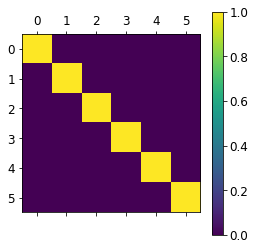

In [5]:
M = np.dot(OBJECT.A.T , OBJECT.A)
plt.matshow(M, interpolation='none')
plt.colorbar()
plt.show()

Now we repeat the same process using the greedy subsamples

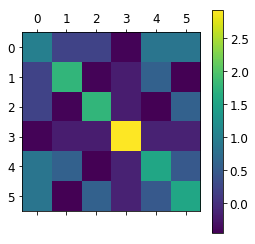

In [6]:
M = np.dot(OBJECT.Az.T , OBJECT.Az)
plt.matshow(M, interpolation='none')
plt.colorbar()
plt.show()

Now, we shall try to approximate this function using the coefficients computed. For completeness, the coefficients are given below

In [7]:
OBJECT.computeCoefficients(fun)

Now, let us plot this polynomial approximation! The <font color=blue> contour_plot </font> plotting utility is useful for this.

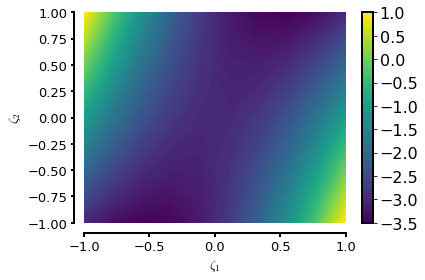

In [8]:
nx, ny = 10, 10
stack, P1, P2 = meshgrid(-1., 1., nx, ny)
F = OBJECT.evaluatePolyFit(stack)
F_approx = np.reshape(F, (nx, ny))
contour_plot(P1, P2, F_approx)

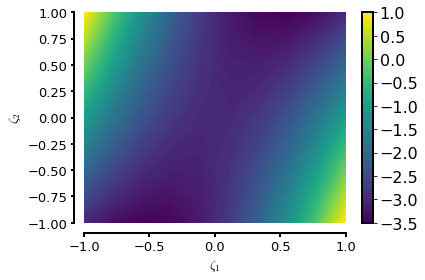

In [9]:
F_real = fun([P1, P2])
contour_plot(P1, P2, F_real)

Just to confirm everything is OK, subtract the two matrices!

In [10]:
print np.linalg.norm(F_real - F_approx, 2)

3.07814090948973e-14
